# Superstaq Basics in Qiskit

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Infleqtion/client-superstaq/blob/main/docs/source/get_started/basics/basics_qss.ipynb) [![Launch Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Infleqtion/client-superstaq/HEAD?labpath=docs/source/get_started/basics/basics_qss.ipynb)

Here we demonstrate the basics of Superstaq by creating a circuit in Qiskit and submitting to IBM's QASM simulator. We assume you have a basic understanding of Python, as well as some familiarity with Qiskit.

## Import Superstaq and requirements

First, you will need to install and then import the packages required to allow Superstaq to run.

In [1]:
%pip install -q qiskit-superstaq[examples]

In [2]:
# Requirements to use qiskit-superstaq
import qiskit
import qiskit_superstaq as qss

# Optional
import os  # Used to store a token in an environment variable

If you do not have the requirements already installed on your machine, you may add a code cell into the notebook to run `!pip install <package_name>` or run in terminal `pip install <package_name>`.

## Set up access to Superstaq's API
You will need to first grab your Superstaq API key. Here, we store the API key in an environment variable, but you may also pass your token to the `api_key` parameter of `qss.SuperstaqProvider()`.

To set up an environment variable, run `export SUPERSTAQ_API_KEY="<token>"`, where `token` is the API key you have retrieved from https://superstaq.infleqtion.com, in the terminal where you are using Superstaq. Alternatively, you can add a cell to this notebook and run `!export SUPERSTAQ_API_KEY="<token>"`.

In [3]:
# Provider for Superstaq backend
provider = qss.SuperstaqProvider()

## Create a circuit
Now, use Qiskit to create the circuit you desire. Here, we create a Bell state circuit.

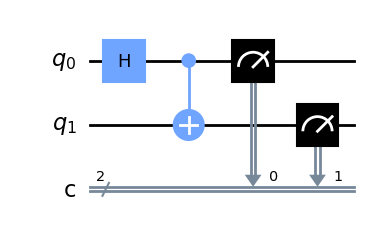

In [4]:
# Using Qiskit
qc = qiskit.QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
qc.draw(output="mpl")

## Submit your circuit and view results
Finally, we can submit our circuit to the desired device (by calling `get_backend`) and view the results of our job. 

Here, we will simulate for [IBM's QASM simulator](https://quantum-computing.ibm.com/lab/docs/iql/manage/simulator), but you can access, compile, and simulate to many other devices via Superstaq!

To perform the simulation, we must instruct Superstaq to simulate the circuit to the desired target backend by passing `"dry-run"` as the `method`. Simulation via `"dry-run"` is a feature that is available to all users including free-trial users! Finally, we can retrieve the results of the job, the counts, by calling `result().get_counts()`.

In [5]:
backend = provider.get_backend("ibmq_qasm_simulator")

# Specify "dry-run" as the method to submit & run a Superstaq simulation
job = backend.run(qc, method="dry-run", shots=100)
result = job.result().get_counts()
print(result)

{'00': 49, '11': 51}
